# 预测新图像

使用训练好的图像分类模型，对新图像文件进行预测。

同济子豪兄：https://space.bilibili.com/1900783

[代码运行云GPU环境](https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1)：GPU RTX 3060、CUDA v11.2

## 导入工具包

In [1]:
import torch
import torchvision
import torch.nn.functional as F

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# 有 GPU 就用 GPU，没有就用 CPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

D:\Software\anaconda\envs\Pytorch\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
device

device(type='cuda', index=0)

## 设置matplotlib中文字体

In [90]:
# # windows操作系统
# plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签 
# plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [91]:
# Mac操作系统，参考 https://www.ngui.cc/51cto/show-727683.html
# 下载 simhei.ttf 字体文件
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf

In [5]:
# Linux操作系统，例如 云GPU平台：https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1
# 如果遇到 SSL 相关报错，重新运行本代码块即可
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O /environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
!rm -rf /home/featurize/.cache/matplotlib

import matplotlib
matplotlib.rc("font",family='SimHei') # 中文字体


'wget' is not recognized as an internal or external command,
operable program or batch file.
'rm' is not recognized as an internal or external command,
operable program or batch file.


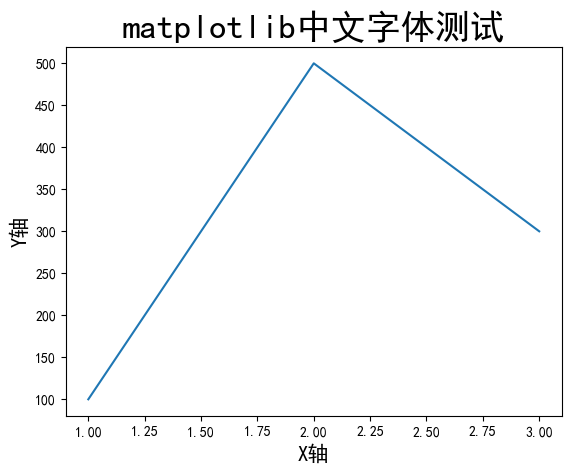

In [6]:
plt.plot([1,2,3], [100,500,300])
plt.title('matplotlib中文字体测试', fontsize=25)
plt.xlabel('X轴', fontsize=15)
plt.ylabel('Y轴', fontsize=15)
plt.show()

## 导入pillow中文字体

In [7]:
from PIL import Image, ImageFont, ImageDraw
# 导入中文字体，指定字号
font = ImageFont.truetype('SimHei.ttf', 20)

## 载入类别

In [8]:
idx_to_labels = np.load(r'E:\MV-Code-202018010103-Lucy\main\Train_Custom_Dataset\图像分类\3-【Pytorch】迁移学习训练自己的图像分类模型\idx_to_labels.npy', allow_pickle=True).item()

In [9]:
idx_to_labels

{0: 'parasitized', 1: 'uninfected'}

## 导入训练好的模型

In [10]:
model = torch.load( r'E:\MV-Code-202018010103-Lucy\main\Train_Custom_Dataset\图像分类\3-【Pytorch】迁移学习训练自己的图像分类模型\checkpoint\best-1.000.pth')
model = model.eval().to(device)

## 预处理

In [11]:
from torchvision import transforms
# 测试集图像预处理-RCTN：缩放、裁剪、转 Tensor、归一化
test_transform = transforms.Compose([transforms.Resize(256),
                                     transforms.CenterCrop(224),
                                     transforms.ToTensor(),
                                     transforms.Normalize(
                                         mean=[0.485, 0.456, 0.406], 
                                         std=[0.229, 0.224, 0.225])
                                    ])

## 载入一张测试图像

In [12]:
from PIL import Image

In [35]:
img_path = r"D:\dataset\Parasitized\C39P4thinF_original_IMG_20150622_105102_cell_84_RCAN_BIX4-official.png"
# img_path = 'test_img/banana1.jpg'
# img_path = 'test_img/test_bananan.jpg'
# img_path = 'test_img/test_orange.jpg'
# img_path = 'test_img/test_orange_2.jpg'
# img_path = 'test_img/test_kiwi.jpg'
# img_path = 'test_img/test_lemon.jpg'
# img_path = 'test_img/test_石榴.jpg'
# img_path = 'test_img/test_火龙果.jpg'

In [36]:
img_pil = Image.open(img_path)

In [37]:
np.array(img_pil).shape

(998, 1356, 4)

ValueError: Could not save to JPEG for display

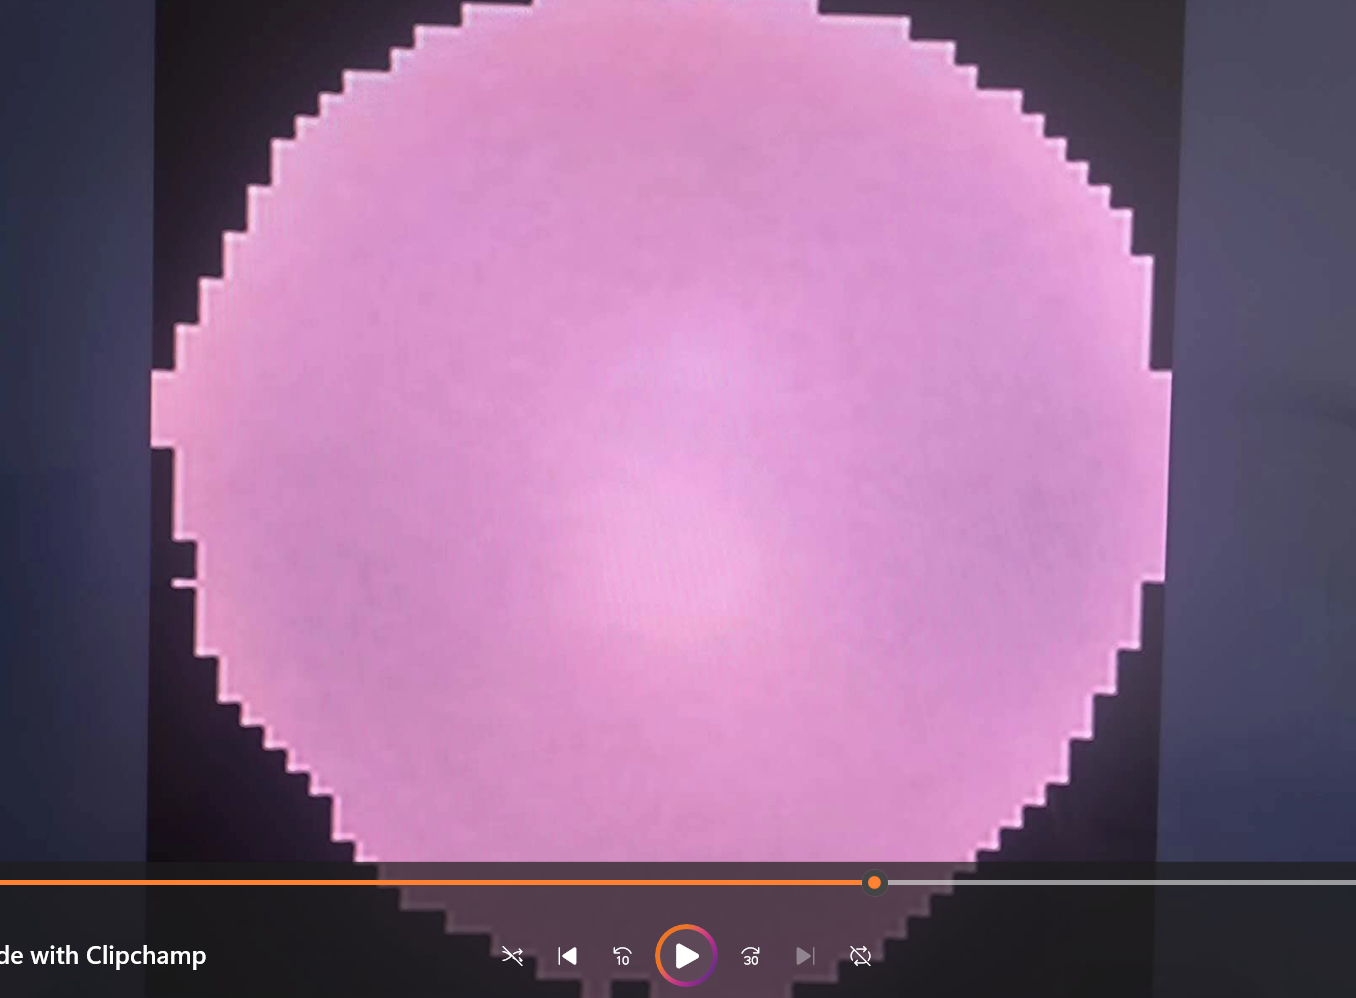

In [38]:
img_pil

## 预处理、前向预测

In [40]:
input_img = test_transform(img_pil) # 预处理

RuntimeError: The size of tensor a (4) must match the size of tensor b (3) at non-singleton dimension 0

In [41]:
input_img.shape

torch.Size([1, 3, 224, 224])

In [42]:
input_img = input_img.unsqueeze(0).to(device)

In [43]:
input_img.shape

torch.Size([1, 1, 3, 224, 224])

In [44]:
# 执行前向预测，得到所有类别的 logit 预测分数
pred_logits = model(input_img) 

RuntimeError: Expected 3D (unbatched) or 4D (batched) input to conv2d, but got input of size: [1, 1, 3, 224, 224]

In [22]:
pred_logits

tensor([[ 7.8868, -7.3061]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [23]:
pred_softmax = F.softmax(pred_logits, dim=1) # 对 logit 分数做 softmax 运算

In [24]:
pred_softmax

tensor([[1.0000e+00, 2.5226e-07]], device='cuda:0', grad_fn=<SoftmaxBackward0>)

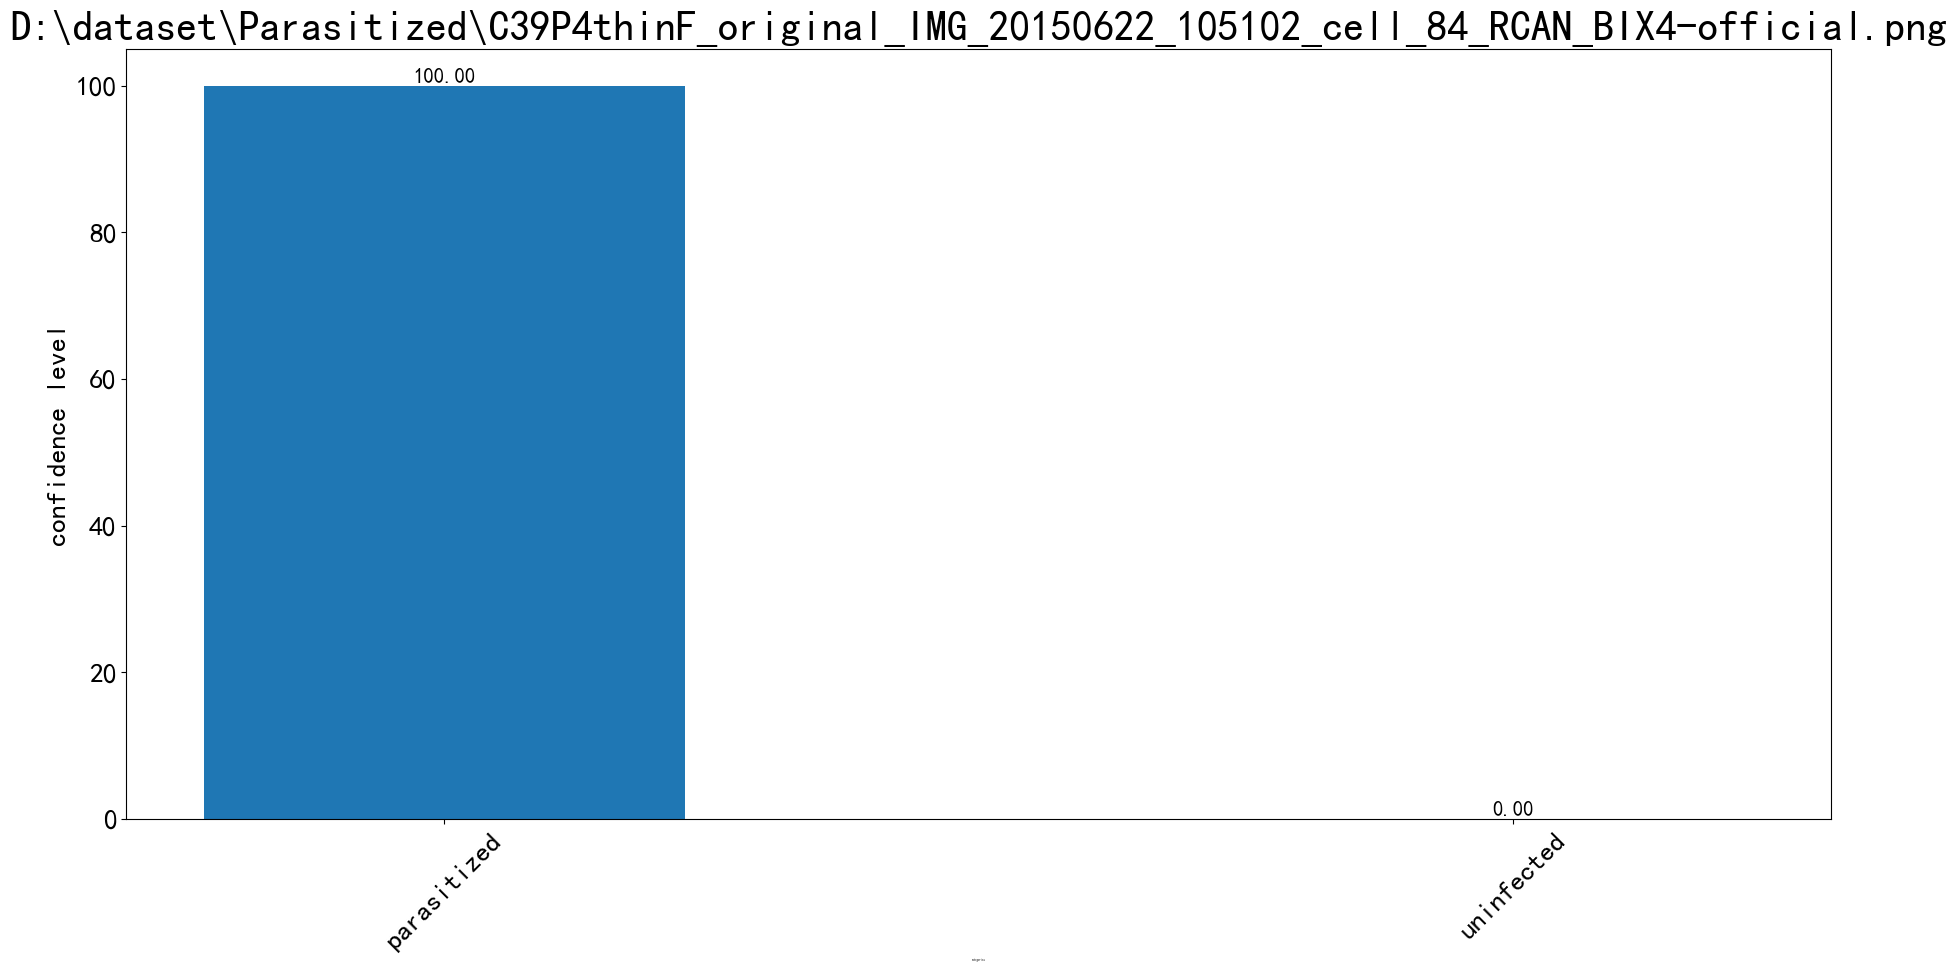

In [27]:
plt.figure(figsize=(22, 10))

x = idx_to_labels.values()
y = pred_softmax.cpu().detach().numpy()[0] * 100
width = 0.45 # 柱状图宽度

ax = plt.bar(x, y, width)

plt.bar_label(ax, fmt='%.2f', fontsize=15) # 置信度数值
plt.tick_params(labelsize=20) # 设置坐标文字大小

plt.title(img_path, fontsize=30)
plt.xticks(rotation=45) # 横轴文字旋转
plt.xlabel('cata', fontsize=2)
plt.ylabel('confidence level', fontsize=20)
plt.show()

## 置信度最大的前 n 个结果

In [28]:
n = 2
top_n = torch.topk(pred_softmax, n) # 取置信度最大的 n 个结果
pred_ids = top_n[1].cpu().detach().numpy().squeeze() # 解析出类别
confs = top_n[0].cpu().detach().numpy().squeeze() # 解析出置信度

In [29]:
pred_ids

array([0, 1], dtype=int64)

In [30]:
confs

array([9.9999976e-01, 2.5225521e-07], dtype=float32)

## 图像分类结果写在原图上

In [31]:
draw = ImageDraw.Draw(img_pil)

In [32]:
for i in range(n):
    class_name = idx_to_labels[pred_ids[i]] # 获取类别名称
    confidence = confs[i] * 100 # 获取置信度
    text = '{:<15} {:>.4f}'.format(class_name, confidence) # 保留 4 位小数
    print(text)
    
    # 文字坐标，中文字符串，字体，rgba颜色
    draw.text((50, 100 + 50 * i), text, font=font, fill=(255, 0, 0, 1))

parasitized     100.0000
uninfected      0.0000


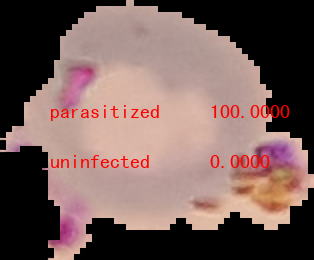

In [33]:
img_pil

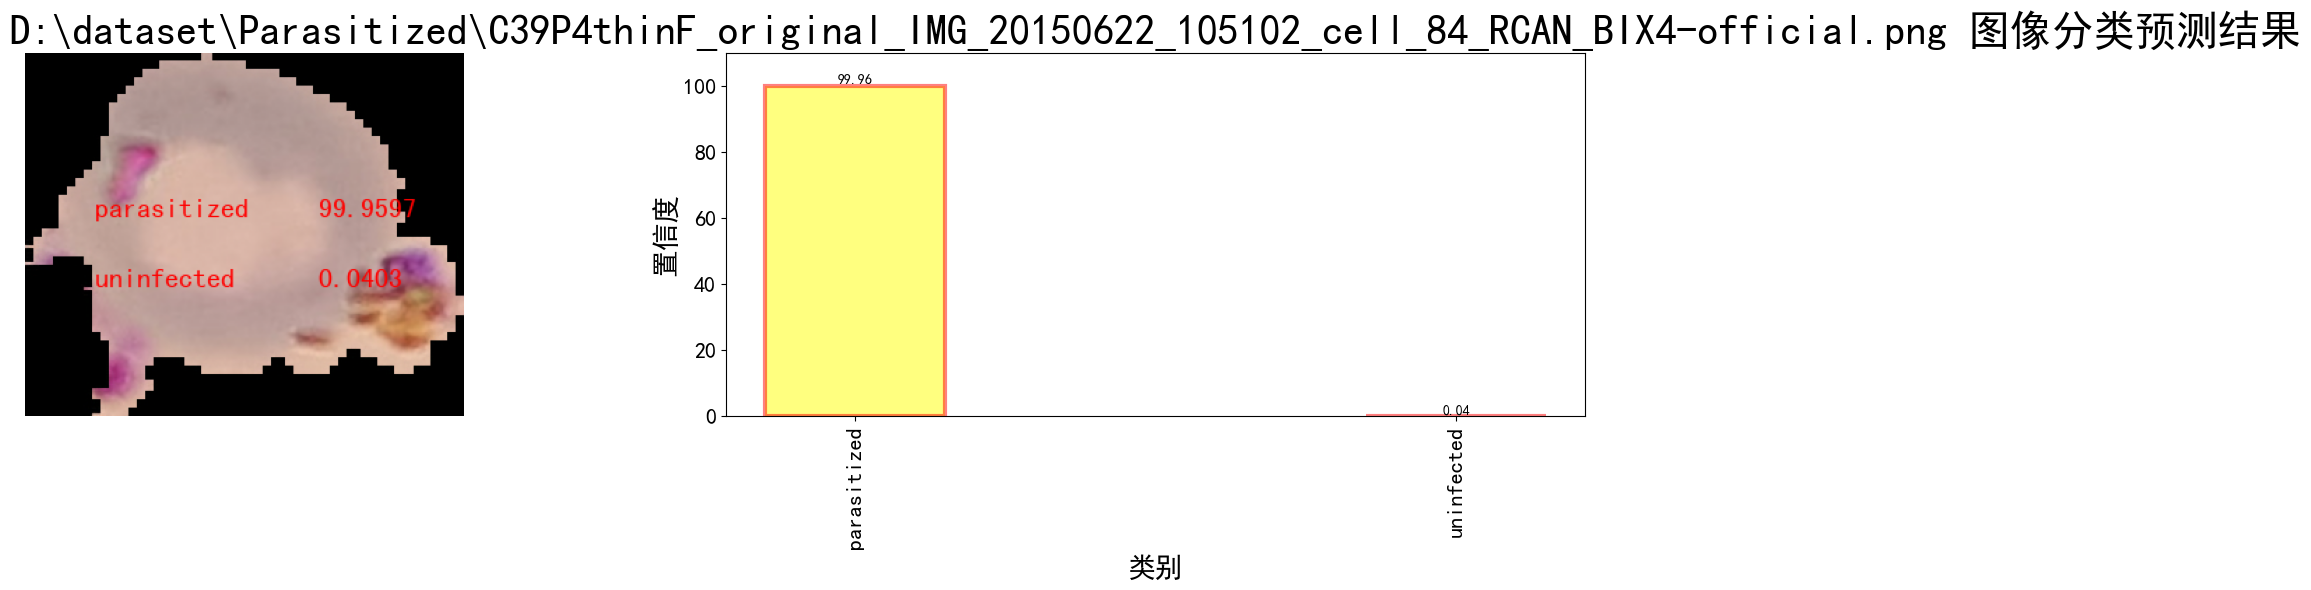

In [119]:
fig = plt.figure(figsize=(18,6))

# 绘制左图-预测图
ax1 = plt.subplot(1,2,1)
ax1.imshow(img_pil)
ax1.axis('off')

# 绘制右图-柱状图
ax2 = plt.subplot(1,2,2)
x = idx_to_labels.values()
y = pred_softmax.cpu().detach().numpy()[0] * 100
ax2.bar(x, y, alpha=0.5, width=0.3, color='yellow', edgecolor='red', lw=3)
plt.bar_label(ax, fmt='%.2f', fontsize=10) # 置信度数值

plt.title('{} 图像分类预测结果'.format(img_path), fontsize=30)
plt.xlabel('类别', fontsize=20)
plt.ylabel('置信度', fontsize=20)
plt.ylim([0, 110]) # y轴取值范围
ax2.tick_params(labelsize=16) # 坐标文字大小
plt.xticks(rotation=90) # 横轴文字旋转

plt.tight_layout()
fig.savefig('output/预测图+柱状图.jpg')

### 预测结果表格输出

In [34]:
rows_list = []

for i in range(n):
    class_name = idx_to_labels[pred_ids[i]]  # Get the class name
    label_idx = int(pred_ids[i])  # Get the class ID
    confidence = confs[i] * 100  # Get the confidence percentage
    # Append a dictionary of this row of data to the list
    rows_list.append({'Class': class_name, 'Class_ID': label_idx, 'Confidence(%)': confidence})

# Create a DataFrame from the list of row data
pred_df = pd.concat([pd.DataFrame([row]) for row in rows_list], ignore_index=True)

display(pred_df)  # Display the prediction DataFrame

,Class,Class_ID,Confidence(%)
0,parasitized,0,99.999976
1,uninfected,1,0.000025


## 参考文档

https://www.bilibili.com/video/BV1qe4y1D7zD